In [71]:
import xarray as xr
import numpy as np
%matplotlib inline

In [57]:
ddir = '/swot/SUM03/copernicus/dataset-duacs-nrt-global-merged-allsat-phy-l4-v3'
ds = xr.open_dataset(ddir + '/nrt_global_allsat_phy_l4_20180501_20180507.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440, nv: 2, time: 1)
Coordinates:
  * time       (time) datetime64[ns] 2018-05-01
  * latitude   (latitude) float32 -89.875 -89.625 -89.375 -89.125 -88.875 ...
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 ...
  * nv         (nv) int32 0 1
Data variables:
    crs        int32 ...
    lat_bnds   (latitude, nv) float32 ...
    lon_bnds   (longitude, nv) float32 ...
    ugosa      (time, latitude, longitude) float64 ...
    adt        (time, latitude, longitude) float64 ...
    ugos       (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    vgosa      (time, latitude, longitude) float64 ...
    err        (time, latitude, longitude) float64 ...
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                

In [60]:
reg = ds.sel(longitude=slice(360-136, 360-130), latitude=slice(-9, -3))
reg.longitude.data = reg.longitude.data - 360

In [62]:
u, v = reg.ugos.data[0], reg.vgos.data[0]

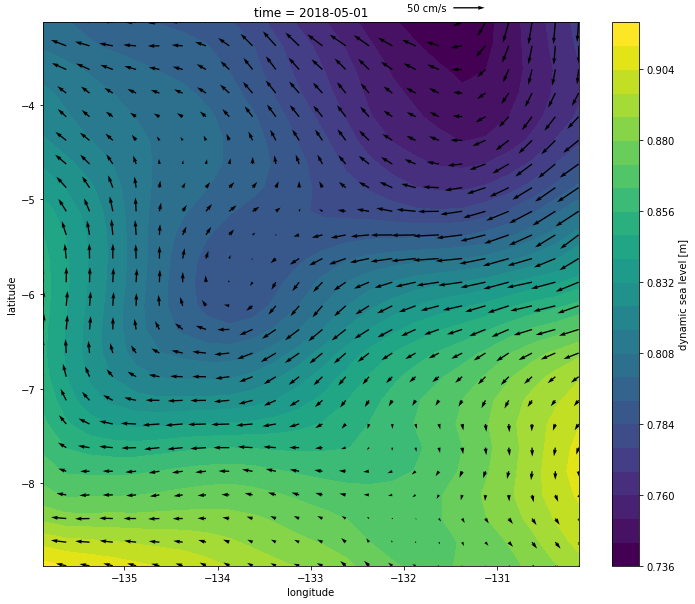

In [66]:
fig, ax = plt.subplots(figsize=(12,10))
reg.adt[0].rename('dynamic sea level [m]').plot.contourf(levels=30)
quiv = plt.quiver(reg.longitude.data, reg.latitude.data, u, v, color='k')
qk = plt.quiverkey(quiv, 0.6, 0.9, 0.5, '50 cm/s', coordinates='figure', labelpos='W')

In [69]:
minutes_to_drop = 4000 / 45
seconds_to_drop = minutes_to_drop * 60
drift = 200 # m
mean_vel = drift / seconds_to_drop
mean_vel

0.037500000000000006

Text(0,0.5,'Depth')

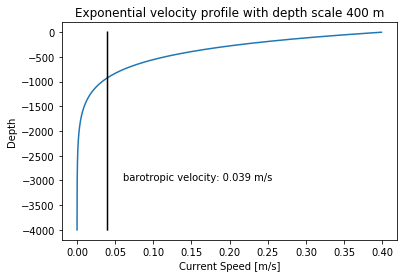

In [89]:
u_top = 0.4
z = np.arange(-4000, 0)
h = 400
u_prof = u_top * np.exp(z/h)
u_mean = u_prof.mean()
plt.plot(u_prof, z)
plt.plot(u_mean*np.ones_like(z), z, 'k')
plt.text(u_mean + 0.02, -3000, 'barotropic velocity: %3.5s m/s' % u_mean)
plt.title('Exponential velocity profile with depth scale %g m' % h)
plt.xlabel('Current Speed [m/s]')
plt.ylabel('Depth')

In [73]:
u_prof.mean()

0.098119360073773892